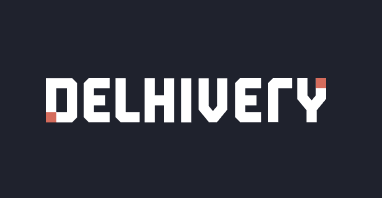

In [ ]:
!gdown '12cyX1cS1pnzJHXP1U9tdWNyR4aFqHYq9'

Downloading...
From: https://drive.google.com/uc?id=12cyX1cS1pnzJHXP1U9tdWNyR4aFqHYq9
To: /content/delhivery_data.csv
100% 55.6M/55.6M [00:00<00:00, 132MB/s]


#Defining the problem statement:



---


**Introduction**:

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.


---

**The Problem Statement**

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it.


---



# Basic EDA and Handling Missing Values

In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('delhivery_data.csv')
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


In [ ]:
print(f'Number of rows : {df.shape[0]}, Number of columns : {df.shape[1]}')
print('Number of rows containing training data : ',df[df['data']=='training'].shape[0])
print('Number of rows containing testing data : ',df[df['data']!='test'].shape[0])

Number of rows : 144867, Number of columns : 24
Number of rows containing training data :  104858
Number of rows containing testing data :  104858


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
np.round(df.describe(),3)

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000,144867.000
mean,961.263,232.927,234.073,416.928,213.868,284.771,2.120,36.196,18.508,22.829,2.218
std,1037.013,344.756,344.990,598.104,308.011,421.119,1.715,53.571,14.776,17.861,4.848
min,20.000,9.000,9.000,9.000,6.000,9.008,0.144,-244.000,0.000,0.000,-23.444
25%,161.000,22.000,23.356,51.000,27.000,29.915,1.604,20.000,11.000,12.070,1.348
50%,449.000,66.000,66.127,132.000,64.000,78.526,1.857,29.000,17.000,23.513,1.684
75%,1634.000,286.000,286.709,513.000,257.000,343.193,2.213,40.000,22.000,27.813,2.250
max,7898.000,1927.000,1927.448,4532.000,1686.000,2326.199,77.387,3051.000,1611.000,2191.404,574.250


In [ ]:
np.round(df.isna().sum()/len(df) * 100,2)

data                              0.00
trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
is_cutoff                         0.00
cutoff_factor                     0.00
cutoff_timestamp                  0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
factor                            0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
segment_factor                    0.00
dtype: float64

**Since, the missing values are present only in 2 features and their percentages are 0.2% and 0.18%, therefore let's drop these rows.**

In [ ]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


**For proper treatment of the data, let's convert data type of time-based-data columns**

In [ ]:
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

In [ ]:
df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714


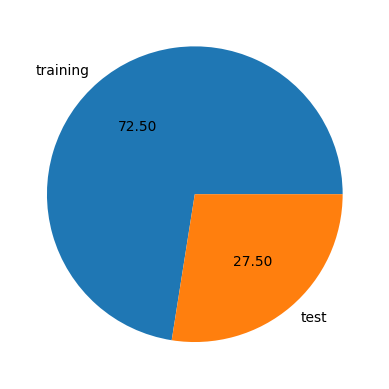

In [ ]:
data_distribution = df['data'].value_counts(normalize=True)*100
plt.pie(x = data_distribution, labels = data_distribution.index,autopct = '%.2f')
plt.show()

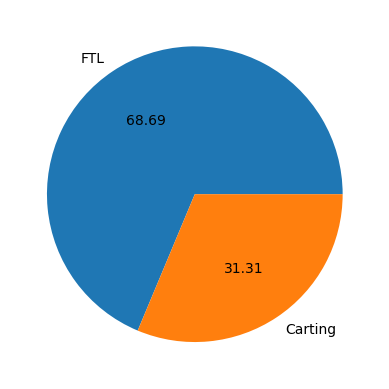

In [ ]:
route_type_distribution = df['route_type'].value_counts(normalize=True)*100
plt.pie(x = route_type_distribution, labels = route_type_distribution.index,autopct = '%.2f')
plt.show()

# Grouping the data into sub-journey

**Let's first create a unique identifier for each subjourney. This identifier will consist of trip_uuid, source_center and destination_center**

In [ ]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
df[['segment_key']].head(3)

,segment_key
0,trip-153741093647649320IND388121AAAIND388620AAB
1,trip-153741093647649320IND388121AAAIND388620AAB
2,trip-153741093647649320IND388121AAAIND388620AAB


**Now, let's use this identifier for groupby to create cleaner data**

In [ ]:
segment_columns = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for i in segment_columns:
  df[i + '_sum'] = df.groupby('segment_key').aggregate({i:'cumsum'})

df[[i+'_sum' for i in segment_columns]].head(3)

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_key', 'segment_actual_time_sum', 'segment_osrm_distance_sum',
       'segment_osrm_time_sum'],
      dtype='object')

**Aggregation at sub-journey level**


---
**Let's create a dictionary which will be used as an argument that specifies how to aggregate columns when grouping data by certain criteria.**

**For keys *'data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'od_start_time', 'od_end_time', and 'start_scan_to_end_scan'*, the value 'first' indicates that the first occurrence of each unique value in the group should be retained.**


**For keys *'destination_center', 'destination_name', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', and 'segment_osrm_time_sum'*, the value 'last' indicates that the last occurrence of each unique value in the group should be retained**


---



In [ ]:
segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

**Grouping mini trips and sorting them by time**

In [ ]:
segment_df = df.groupby('segment_key').aggregate(segment_dict).reset_index()
segment_df = segment_df.sort_values(by=['segment_key','od_end_time']).reset_index()
segment_df.head(3)

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0


In [ ]:
segment_df.shape

(26222, 21)

**Example**

In [ ]:
segment_df[segment_df['trip_uuid']=='trip-153671074033284934']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
15,15,trip-153671074033284934IND395009AAAIND395023AAD,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,trip-153671074033284934,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395023AAD,...,2018-09-12 02:31:39.246238,2018-09-12 05:16:28.581141,164.0,12.264924,128.0,16.0,17.0225,128.0,17.0225,16.0
16,16,trip-153671074033284934IND395023AADIND395004AAB,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,trip-153671074033284934,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395004AAB,...,2018-09-12 00:05:40.333071,2018-09-12 02:01:41.638015,116.0,13.189924,33.0,13.0,13.9134,33.0,13.9133,13.0


In [ ]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           26222 non-null  int64         
 1   segment_key                     26222 non-null  object        
 2   data                            26222 non-null  object        
 3   trip_creation_time              26222 non-null  datetime64[ns]
 4   route_schedule_uuid             26222 non-null  object        
 5   route_type                      26222 non-null  object        
 6   trip_uuid                       26222 non-null  object        
 7   source_center                   26222 non-null  object        
 8   source_name                     26222 non-null  object        
 9   destination_center              26222 non-null  object        
 10  destination_name                26222 non-null  object        
 11  od

#Feature Engineering

**Let's create a fearture "od_time_diff_hour" using od_start_time and od_end_time and convert it to hours.**

In [ ]:
segment_df['od_time_diff_hour'] = (segment_df['od_end_time'] - segment_df['od_start_time']).dt.total_seconds()/60
segment_df.head(3)

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0,1260.604421
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0,999.505379
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0,58.832388


**Aggregation at sub-journey level**


---
**Let's create a dictionary which will be used as an argument that specifies how to aggregate columns when grouping data by certain criteria.**

**For keys *'data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', and 'source_name'*, the value 'first' indicates that the first occurrence of each unique value in the group should be retained.**

**For keys *'destination_center' and 'destination_name'*, the value 'last' indicates that the last occurrence of each unique value in the group should be retained.**

**For keys *'start_scan_to_end_scan', 'od_time_diff_hour', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum', 'segment_osrm_distance_sum', and 'segment_osrm_time_sum'*, the value 'sum' indicates that the sum of all values in the group should be computed and retained.**

---



In [ ]:
trip_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    'destination_center' : 'last',
    'destination_name' : 'last',
    'start_scan_to_end_scan' : 'sum',
    'od_time_diff_hour' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
}

In [ ]:
trip_df = segment_df.groupby('trip_uuid').aggregate(trip_dict).reset_index(drop = True)
trip_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0


In [ ]:
trip_df.shape

(14787, 18)

In [ ]:
trip_df[['actual_time','segment_actual_time_sum']].head(10)

,actual_time,segment_actual_time_sum
0,1562.0,1548.0
1,143.0,141.0
2,3347.0,3308.0
3,59.0,59.0
4,341.0,340.0
5,61.0,60.0
6,24.0,24.0
7,64.0,64.0
8,161.0,161.0
9,23.0,23.0


**Example**

In [ ]:
trip_df[trip_df['trip_uuid'] == 'trip-153671074033284934']

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
8,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,trip-153671074033284934,IND395009AAA,Surat_Central_D_12 (Gujarat),IND395004AAB,Surat_Central_D_3 (Gujarat),280.0,280.843997,25.454848,161.0,29.0,30.9359,161.0,30.9358,29.0


Notice that the values in these two columns don't necessarily match.
So, let's test this hypothesis.


---


Step-1

**Null Hypothesis(H0)** --> There is no difference in *actual_time* and *segment_actual_time_sum*.

**Alternate Hypothesis(HA)** --> There is statistically significant difference in *actual_time* and *segment_actual_time_sum*.


---


STEP-2 : Checking for basic assumpitons for the hypothesis

Plot the histogram to visually see whether it follows  normal distribution.
If it doesn't, use *shapiro-wilk* test to confirm.



---


STEP-3: Define Test statistics; Distribution of T under H0.

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U test for two independent samples.



---


STEP-4: Compute the p-value and compare with the value of alpha.

alpha = 0.05



---


STEP-5: Compare p-value and alpha.

Based on p-value, we will accept or reject H0.
```
p-val > alpha : Accept H0
p-val < alpha : Reject H0
```


---



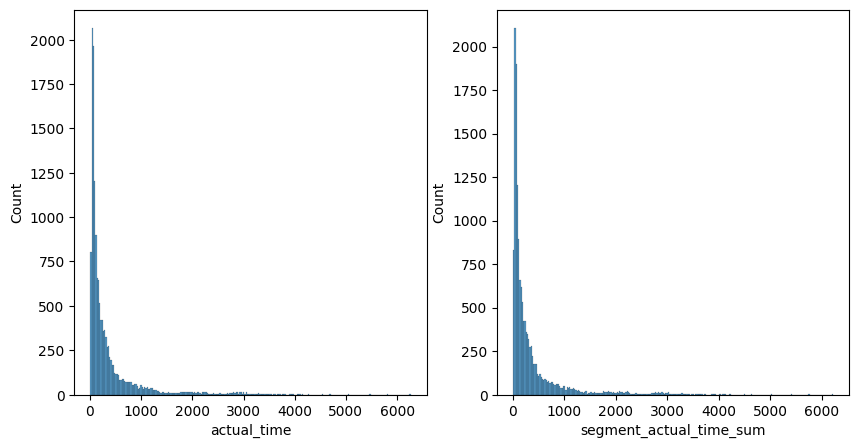

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='actual_time', data=trip_df)
plt.subplot(1,2,2)
sns.histplot(x='segment_actual_time_sum', data=trip_df)
plt.show()

**Neither of the graphs follow *normal* distribution**
**So, let's use *shapiro-wilk* test to confirm the same**

In [ ]:
from scipy.stats import shapiro
p_val_1 = shapiro(trip_df['actual_time'])[1]
p_val_2 = shapiro(trip_df['segment_actual_time_sum'])[1]
print(f'p_value of actual_time is {p_val_1} and p_value of segment_actual_time_sum is {p_val_2}')

p_value of actual_time is 0.0 and p_value of segment_actual_time_sum is 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**This confirms that the graphs don't follow normal distribution.**

**Let's test our hypothesis both visually and statistically (non-parametric test).**

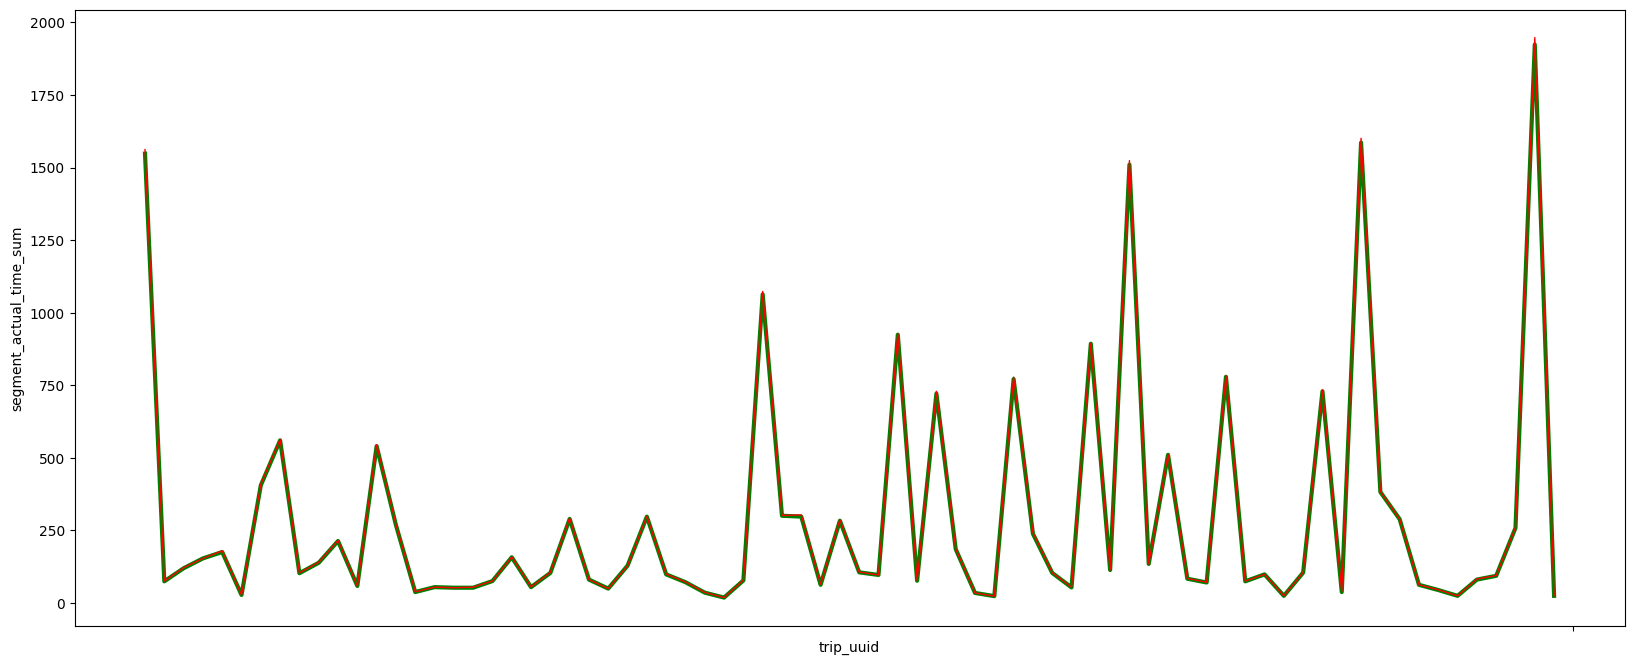

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['segment_actual_time_sum'][::200], color='g', lw=3)
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['actual_time'][::200], color='r', lw=1)
plt.xticks('')
plt.show()

**As, the samples are related/paired, let's use wilcoxon signed rank test**

In [ ]:
from scipy.stats import wilcoxon
p_value = wilcoxon(trip_df['actual_time'],trip_df['segment_actual_time_sum'])[1]

if p_value >= 0.05:
  print('Fail to reject Null Hypothesis')
  print('There is no difference in actual_time and segment_actual_time_sum')
else:
  print('Reject Null Hypothesis')
  print('There is statistically significant difference in actual_time and segment_actual_time_sum.')

Reject Null Hypothesis
There is statistically significant difference in actual_time and segment_actual_time_sum.


*Now, let's check for actual_distance_to_destination and osrm_distance*

In [ ]:
trip_df[['actual_distance_to_destination','osrm_distance']].head(10)

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
5,24.597048,28.0647
6,9.100510,12.0184
7,22.424210,28.9203
8,25.454848,30.9359
9,9.872146,9.9566


Notice that the values in these two columns don't necessarily match. So, let's test this hypothesis.

**Null Hypothesis(H0)** --> There is no difference in *actual_distance_to_destination* and *osrm_distance*

**Alternate Hypothesis(HA)** --> There is statistically significant difference in *actual_distance_to_destination* and *osrm_distance*.

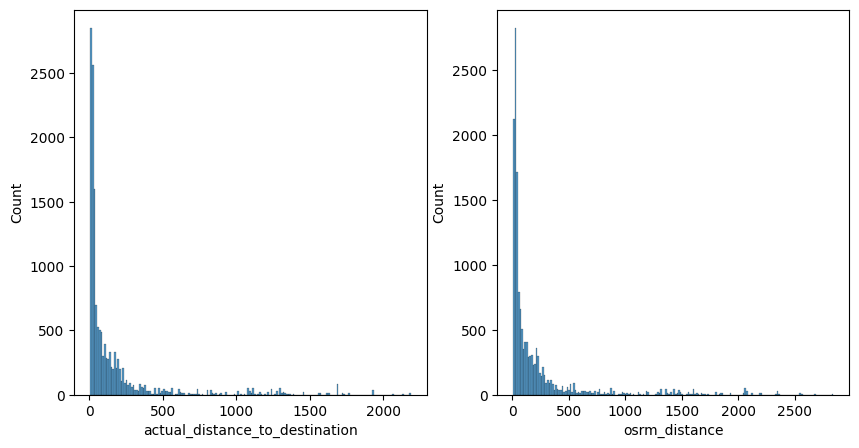

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='actual_distance_to_destination', data=trip_df)
plt.subplot(1,2,2)
sns.histplot(x='osrm_distance', data=trip_df)
plt.show()

**Neither of the graphs follow *normal* distribution**
**So, let's use *shapiro-wilk* test to confirm the same**

In [ ]:
p_val_1 = shapiro(trip_df['actual_distance_to_destination'])[1]
p_val_2 = shapiro(trip_df['osrm_distance'])[1]
print(f'p_value of actual_distance_to_destination is {p_val_1} and p_value of osrm_distance is {p_val_2}')

p_value of actual_distance_to_destination is 0.0 and p_value of osrm_distance is 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**This confirms that the graphs don't follow normal distribution.**


**Let's test our hypothesis both visually and statistically.**

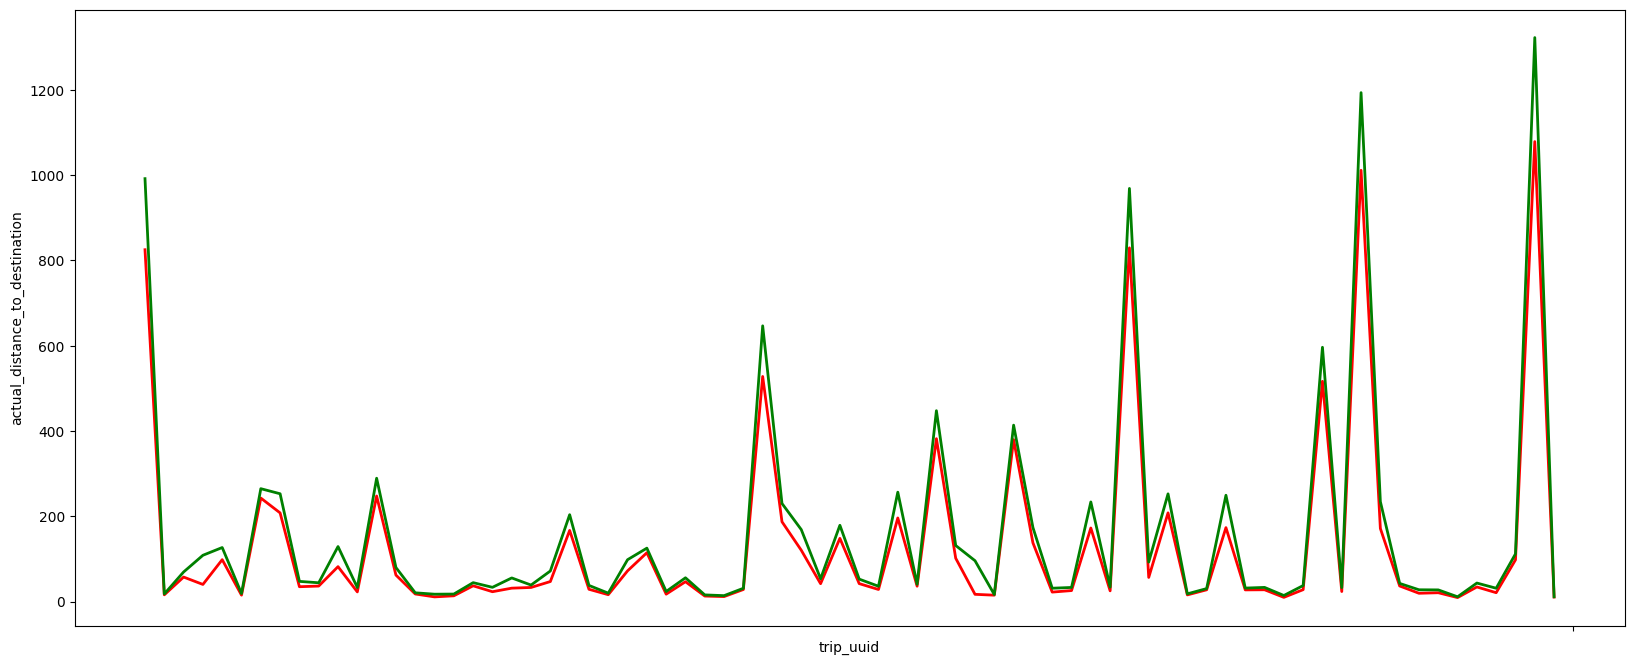

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['actual_distance_to_destination'][::200], color='r', lw=2)
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['osrm_distance'][::200], color='g', lw=2)
plt.xticks('')
plt.show()

In [ ]:
p_value = wilcoxon(trip_df['actual_distance_to_destination'],trip_df['osrm_distance'])[1]

if p_value >= 0.05:
  print('Fail to reject Null Hypothesis')
  print('There is no difference in actual_distance_to_destination and osrm_distance')
else:
  print('Reject Null Hypothesis')
  print('There is statistically significant difference in actual_distance_to_destination and osrm_distance.')

Reject Null Hypothesis
There is statistically significant difference in actual_distance_to_destination and osrm_distance.


Now, let's check if the features *osrm_time* and *segment_osrm_time_sum* are same or not

In [ ]:
trip_df[['osrm_time','segment_osrm_time_sum']].head(10)

,osrm_time,segment_osrm_time_sum
0,717.0,1008.0
1,68.0,65.0
2,1740.0,1941.0
3,15.0,16.0
4,117.0,115.0
5,23.0,23.0
6,13.0,13.0
7,34.0,34.0
8,29.0,29.0
9,8.0,14.0


Notice that the values in these two columns don't necessarily match. So, let's test this hypothesis.

**Null Hypothesis(H0)** --> There is no difference in *actual_distance_to_destination* and *osrm_distance*

**Alternate Hypothesis(HA)** --> There is statistically significant difference in *actual_distance_to_destination* and *osrm_distance*.

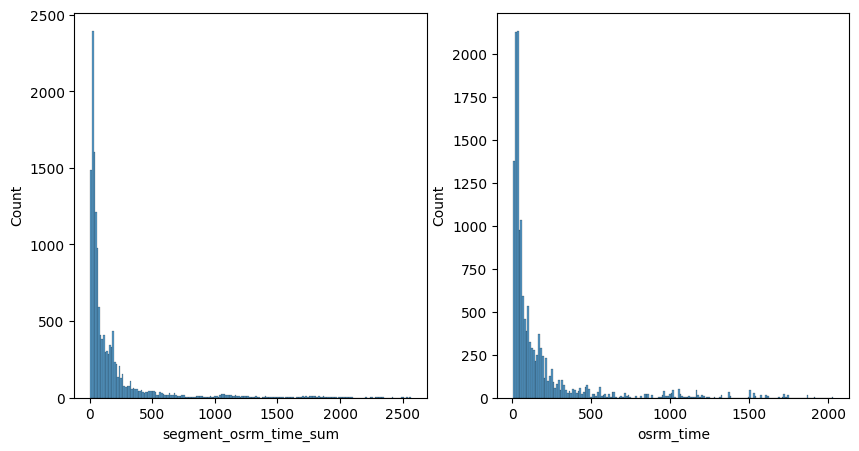

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(x='segment_osrm_time_sum', data=trip_df)
plt.subplot(1,2,2)
sns.histplot(x='osrm_time', data=trip_df)
plt.show()

**Neither of the graphs follow normal distribution So, let's use shapiro-wilk test to confirm the same**

In [ ]:
p_val_1 = shapiro(trip_df['segment_osrm_time_sum'])[1]
p_val_2 = shapiro(trip_df['osrm_time'])[1]
print(f'p_value of segment_osrm_time_sum is {p_val_1} and p_value of osrm_time is {p_val_2}')

p_value of segment_osrm_time_sum is 0.0 and p_value of osrm_time is 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**This confirms that the graphs doesn't follow normal distribution.**

**Let's test our hypothesis both visually and statistically.**

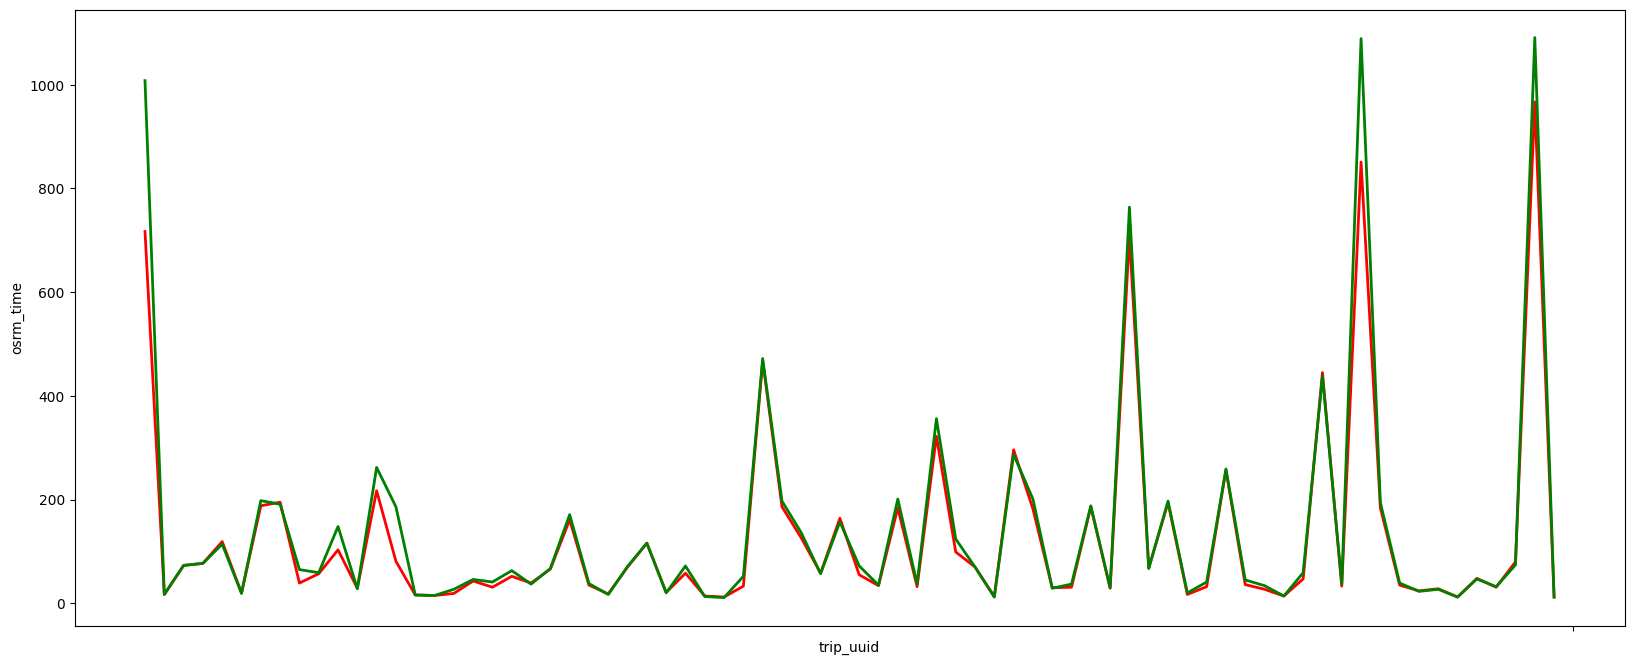

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['osrm_time'][::200], color='r', lw=2)
sns.lineplot(x=trip_df['trip_uuid'][::200], y=trip_df['segment_osrm_time_sum'][::200], color='g', lw=2)
plt.xticks('')
plt.show()

In [ ]:
p_value = wilcoxon(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'])[1]

if p_value >= 0.05:
  print('Fail to reject Null Hypothesis')
  print('There is no difference in osrm_time and segment_osrm_time_sum')
else:
  print('Reject Null Hypothesis')
  print('There is statistically significant difference in osrm_time and segment_osrm_time_sum.')

Reject Null Hypothesis
There is statistically significant difference in osrm_time and segment_osrm_time_sum.


**Now, let's change source_name and destination_name into lower case for futher processing.**

In [ ]:
trip_df['destination_name'] = trip_df['destination_name'].str.lower()
trip_df['source_name'] = trip_df['source_name'].str.lower()
trip_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0


**Let's transaform destiname_name into more meaningful data**

**Let's break down destination_name into state and city**

In [ ]:
def dest_to_state(destination_name):
  state = destination_name.split('(')[1]
  return state[:-1] # to remove the last character ')'


def dest_to_city(destination_name):
  city = destination_name.split('_')[0]
  return city


def dest_to_place(destination_name):
  x = destination_name.split('(')[0]
  lst = x.split('_')

  if len(lst)>=3:
    return lst[1]
  elif len(lst)==2:
    return lst[0]
  else:
    return x.split(' ')[0]


def dest_to_code(destination_name):
  x = destination_name.split('(')[0]
  lst = x.split('_')
  code = lst[-1]
  return code

In [ ]:
trip_df['destination_state'] = trip_df['destination_name'].apply(lambda x: dest_to_state(x))
trip_df['destination_city']  = trip_df['destination_name'].apply(lambda x: dest_to_city(x))
trip_df['destination_place'] = trip_df['destination_name'].apply(lambda x: dest_to_place(x))
trip_df['destination_code']  = trip_df['destination_name'].apply(lambda x: dest_to_code(x))

In [ ]:
trip_df[['destination_state','destination_city','destination_place','destination_code']]

,destination_state,destination_city,destination_place,destination_code
0,uttar pradesh,kanpur,central,6
1,karnataka,doddablpur,chikadpp,d
2,haryana,gurgaon,bilaspur,hb
3,maharashtra,mumbai,mirard,ip
4,karnataka,sandur,wrdn1dpp,d
...,...,...,...,...
14782,punjab,chandigarh,mehmdpur,h
14783,haryana,faridabad,blbgarh,dc
14784,uttar pradesh,kanpur,govndngr,dc
14785,tamil nadu,tirchchndr,shnmgprm,d


In [ ]:
top_states = trip_df.groupby('destination_state').aggregate({'trip_uuid':'count'}).reset_index().sort_values(by='trip_uuid',ascending=False)['destination_state']
print(f'The top 5 states are :{top_states[:5].values}')

top_cities = trip_df.groupby('destination_city').aggregate({'trip_uuid':'count'}).reset_index().sort_values(by='trip_uuid',ascending=False)['destination_city']
print(f'The top 5 cities are :{top_cities[:5].values}')

The top 5 states are :['maharashtra' 'karnataka' 'haryana' 'tamil nadu' 'uttar pradesh']
The top 5 cities are :['bengaluru' 'mumbai' 'gurgaon' 'delhi' 'bangalore']


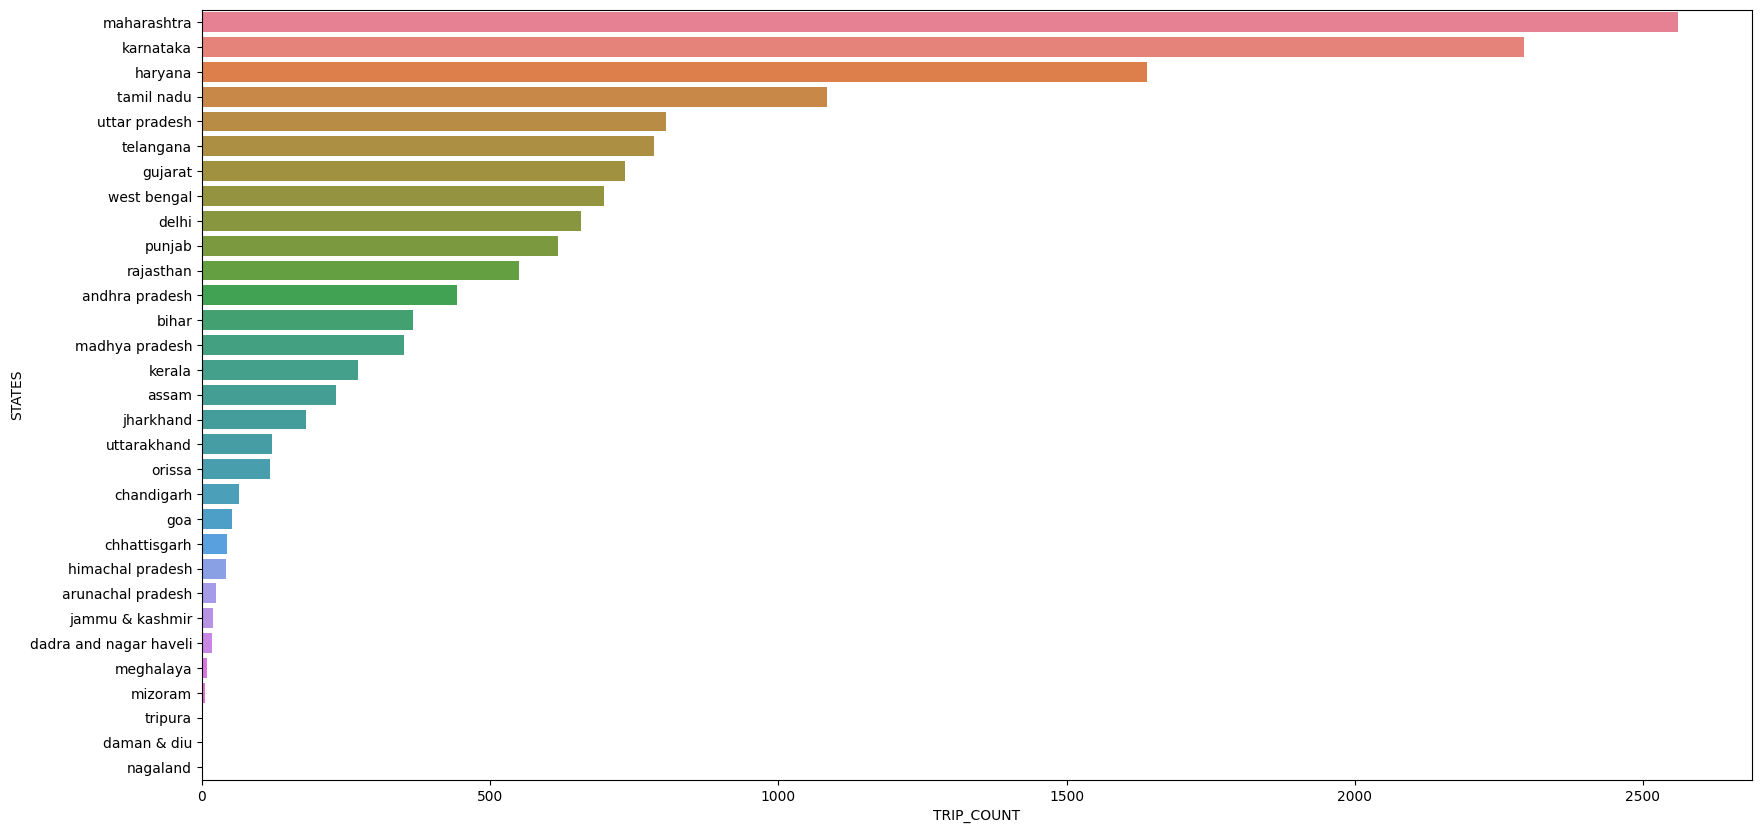

In [ ]:
state_wise_count = trip_df.groupby('destination_state').aggregate({'trip_uuid':'count'}).reset_index().sort_values(by='trip_uuid',ascending=False)['trip_uuid']
plt.figure(figsize=(20,10))
sns.barplot(y=top_states, x=state_wise_count, hue = top_states)
plt.xlabel('TRIP_COUNT')
plt.ylabel('STATES')
plt.show()

In [ ]:
trip_df['trip_year'] = trip_df['trip_creation_time'].dt.year
trip_df['trip_month'] = trip_df['trip_creation_time'].dt.month
trip_df['trip_hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['trip_day'] = trip_df['trip_creation_time'].dt.day
trip_df['trip_week'] = trip_df['trip_creation_time'].dt.isocalendar().week
trip_df['trip_dayofweek'] = trip_df['trip_creation_time'].dt.dayofweek
trip_df[['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']].head(3)

,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,2018,9,0,12,37,2
1,2018,9,0,12,37,2
2,2018,9,0,12,37,2


In [ ]:
# {'0':'Monday', '1':'Tuesday', '2':'Wednesday', '3':'Thursday', '4':'Friday', '5':'Saturday', '6':'Sunday'}
trip_df.groupby('trip_dayofweek').aggregate({'trip_uuid':'count'}).reset_index()

,trip_dayofweek,trip_uuid
0,0,1980
1,1,2035
2,2,2731
3,3,2103
4,4,2057
5,5,2128
6,6,1753


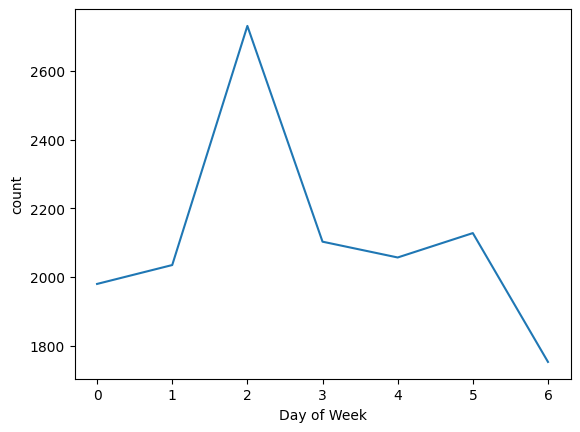

In [ ]:
plt.xlabel('Day of Week')
plt.ylabel('count')
sns.lineplot(trip_df.groupby('trip_dayofweek').aggregate({'trip_uuid':'count'}).reset_index()['trip_uuid'])
plt.show()

**The day that recieves peak orders is *Wednesday***

In [ ]:
date_cols = ['trip_year','trip_month','trip_hour','trip_day','trip_week','trip_dayofweek']
for i in date_cols:
  print('The data belongs to ',trip_df[i].nunique(), ' ',i.split('_')[1],'s', sep='')

The data belongs to 1 years
The data belongs to 2 months
The data belongs to 24 hours
The data belongs to 22 days
The data belongs to 4 weeks
The data belongs to 7 dayofweeks


#Outlier Detection and Treatment

In [ ]:
trip_df.shape

(14787, 28)

In [ ]:
num_cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time',
            'osrm_time', 'osrm_distance','segment_actual_time_sum',
            'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']

**Box-Plot**

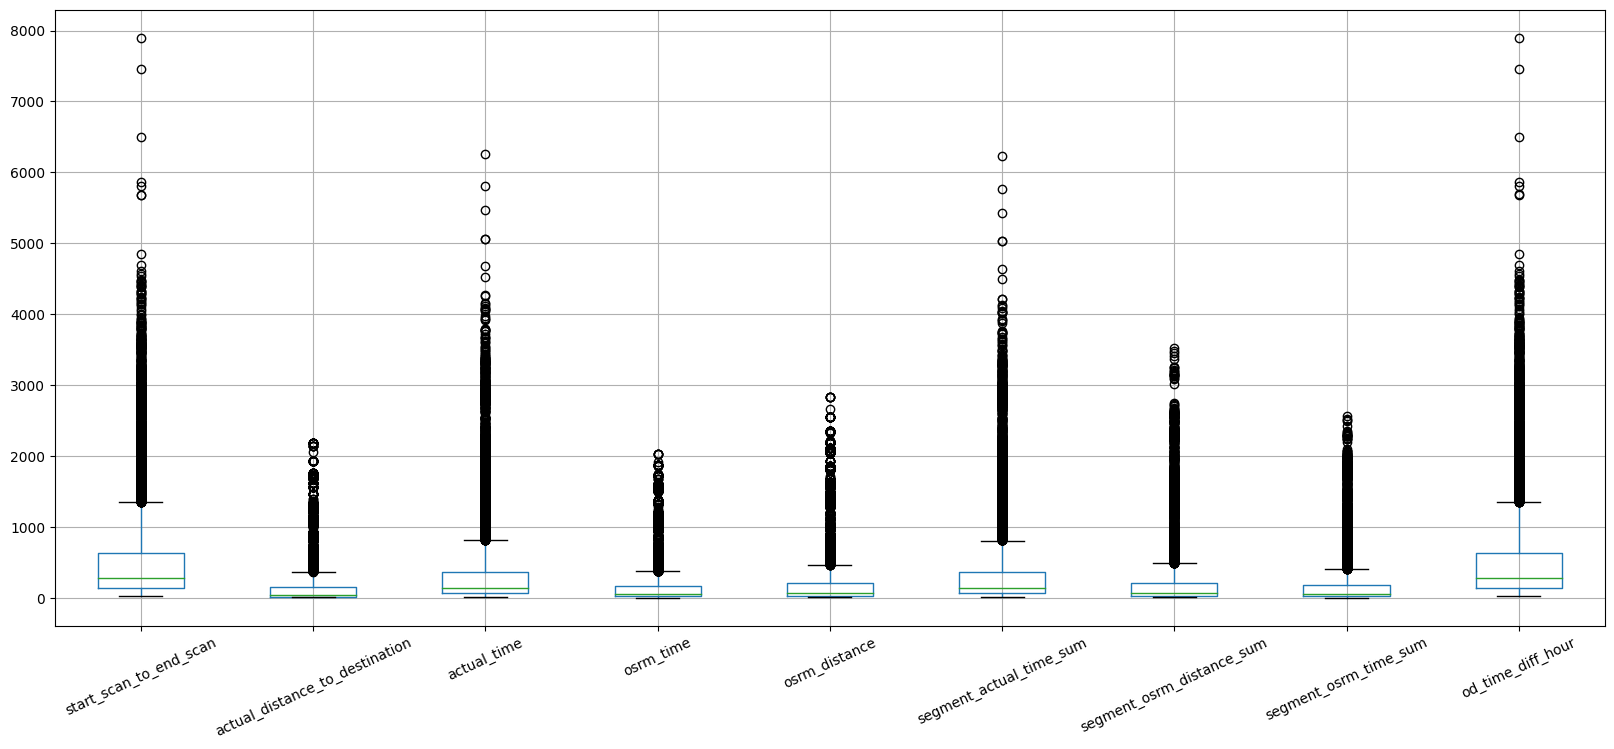

In [ ]:
trip_df[num_cols].boxplot(rot=25, figsize=(20,8))
plt.show()

In [ ]:
Q1 = trip_df[num_cols].quantile(0.25)
Q3 = trip_df[num_cols].quantile(0.75)
IQR = Q3-Q1

In [ ]:
trip_df = trip_df[-((trip_df[num_cols] < (Q1 - IQR*1.5)) | (trip_df[num_cols] > (Q3 + IQR*1.5))).any(axis=1)]
trip_df = trip_df.reset_index(drop=True)
trip_df.shape

(12723, 28)

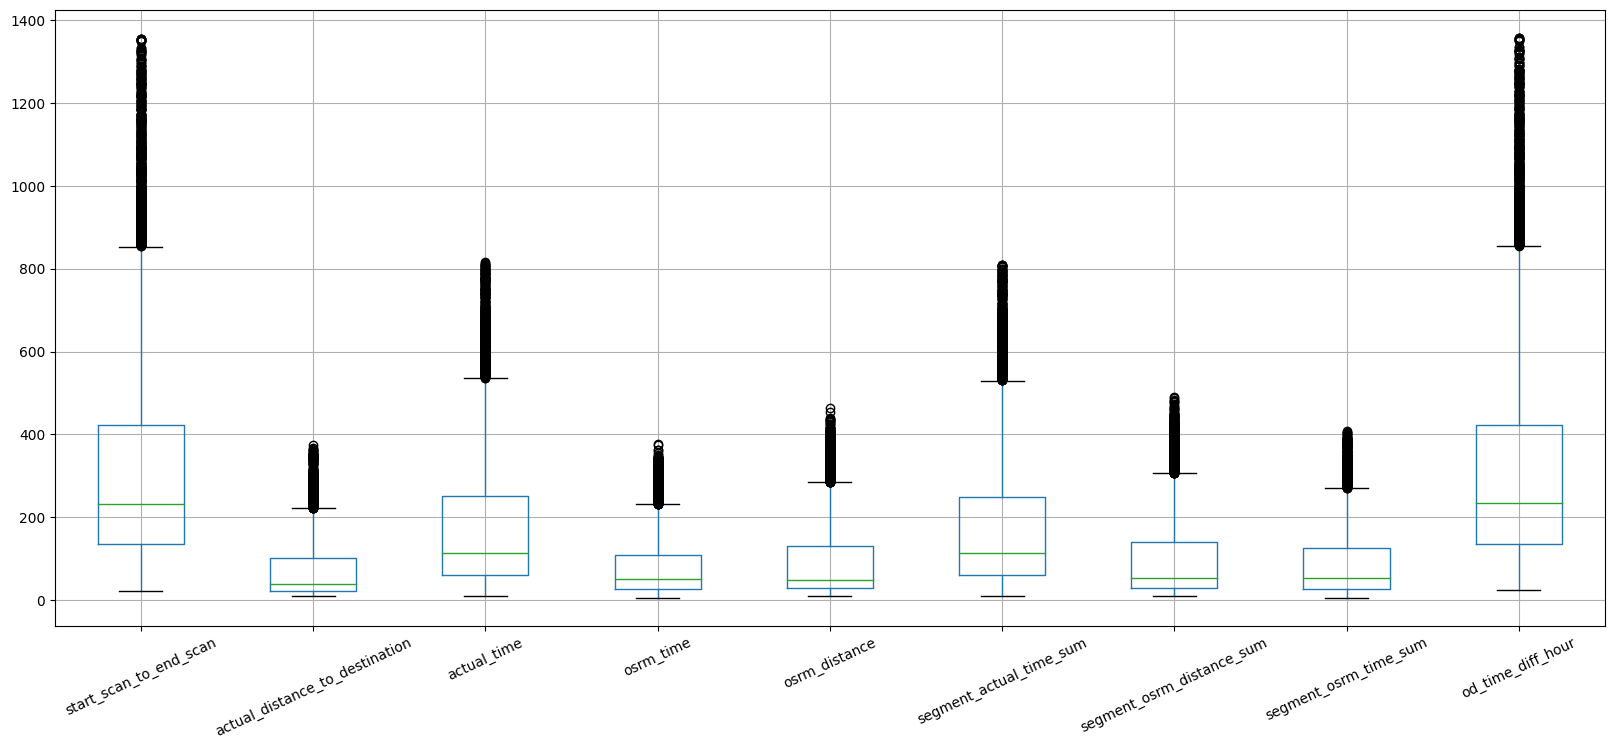

In [ ]:
trip_df[num_cols].boxplot(rot=25, figsize=(20,8))
plt.show()

#Handling Categorical & Numerical Variables

In [ ]:
trip_df['route_type'].unique()

array(['Carting', 'FTL'], dtype=object)

**As there are only 2 categories for 'route_type', so let's do *One-Hot Encoding***

In [ ]:
trip_df['route_type'] = trip_df['route_type'].map({'Carting':0,'FTL':1})
trip_df['route_type'].unique()

array([0, 1])

In [ ]:
trip_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2


Let's do this for *data* feature too

In [ ]:
trip_df['data'].unique()

array(['training', 'test'], dtype=object)

**As there are only 2 categories for *'route_type'*, so let's do One-Hot Encoding**

In [ ]:
trip_df['data'] = trip_df['data'].map({'training':0,'test':1})
trip_df['data'].unique()

array([0, 1])

In [ ]:
trip_df.head(3)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,destination_place,destination_code,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,0,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,0,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,chikadpp,d,2018,9,0,12,37,2
1,0,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,0,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,mirard,ip,2018,9,0,12,37,2
2,0,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,1,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,wrdn1dpp,d,2018,9,0,12,37,2


**Normalizing/ Standardizing the numerical features using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(trip_df[num_cols])

StandardScaler()

In [ ]:
trip_df[num_cols] = scaler.transform(trip_df[num_cols])
trip_df[num_cols]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.145358,-0.262662,-0.544839
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.823653,-0.878225,-0.861856
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.514899,0.365464,1.552812
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.737295,-0.790288,-0.510150
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.906532,-0.915913,-0.871585
...,...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.349273,-0.300349,-0.246189
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.863608,-0.941038,-1.017809
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.072932,0.026276,0.395103
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.324267,1.697092,0.107436


In [ ]:
trip_df[num_cols].describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
count,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04,1.272300e+04
mean,-1.619566e-17,-7.371818e-17,-8.041983e-17,4.467769e-17,3.797603e-17,-3.127438e-17,-8.488760e-17,6.031487e-17,7.818595e-18
std,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00
min,-1.162918e+00,-8.785574e-01,-1.065181e+00,-1.001514e+00,-9.229378e-01,-1.061764e+00,-9.375981e-01,-1.003850e+00,-1.162915e+00
25%,-7.207269e-01,-7.065920e-01,-7.363685e-01,-7.111809e-01,-7.077649e-01,-7.371165e-01,-7.228116e-01,-7.274750e-01,-7.210516e-01
50%,-3.411472e-01,-4.689012e-01,-4.012322e-01,-3.931975e-01,-4.836339e-01,-3.997380e-01,-4.628077e-01,-4.134119e-01,-3.418602e-01
75%,4.023595e-01,4.073375e-01,4.650634e-01,4.224989e-01,4.419548e-01,4.596223e-01,4.488499e-01,4.910897e-01,4.020802e-01
max,4.049455e+00,4.178358e+00,4.031419e+00,4.113871e+00,4.150641e+00,4.037107e+00,4.130135e+00,4.046283e+00,4.050310e+00


#Insights

1.   The data set is corresponding to only 2 months, so not much can be concluded about the seasonal or month-over-month or year-over-year patterns.


2.   There is a significant difference between *actual_time* and *segment_actual_time_sum* which shows there is discrepancy in data entry.


3.   There is a significant difference between *actual_distance_to_destination* and *osrm_distance* which shows that the ML model's prediction is statistically significantly wrong or the delivery executives are not following the predetermined route.


4.   There is a significant difference between *segment_osrm_time_sum* and *osrm_time* which shows that the ML model's prediction is statistically significantly wrong.


5.   The top 5 states are : ***maharashtra, karnataka, haryana, tamil nadu, telangana***


6.   The top 5 cities are : ***bengaluru, mumbai, gurgaon, delhi, hyderabad***


7.   The day on which most orders are generated is a ***Wednesday***.



# Recomendations

*   We should work on imroving the ML model to improve business.
*   We should focus more on those states and cities that provide us with more business by enabling more carries and better infrastructure.
*   We should be ready with more orders on Wednesday by enabling long-shifts and getting more work force.



